In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load Las Vegas Reviews

In [2]:
yelp_lv_rvs = pd.read_csv('../../dataset/las_vegas/las_vegas_review_with_db_id.csv')

In [3]:
len(yelp_lv_rvs)

1604246

In [4]:
yelp_lv_rvs[:5]

,db_id,review_id,user_db_id,business_db_id,stars,year
0,3,---3OXpexMp0oAg77xWfYA,999269,92729,5,2012
1,6,---94vtJ_5o_nikEs6hUjg,313272,122971,5,2014
2,8,---D6-P4MpS86LYldBfX7w,735101,160943,4,2016
3,20,---WDP9kwKyVQiw9GTgNmQ,1045600,12131,1,2014
4,22,---zHMCae68gIbSbtXxD5w,971613,15470,4,2015


In [5]:
rv_years = np.sort(yelp_lv_rvs.year.unique())
rv_years

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

## 2. Time Window - With Sigmoid Function

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x + 2012)) # 这里选择 2012 作为 sigmoid 中心点

In [7]:
yr_scales = sigmoid(rv_years)
yr_scales

array([3.35350130e-04, 9.11051194e-04, 2.47262316e-03, 6.69285092e-03,
       1.79862100e-02, 4.74258732e-02, 1.19202922e-01, 2.68941421e-01,
       5.00000000e-01, 7.31058579e-01, 8.80797078e-01, 9.52574127e-01,
       9.82013790e-01, 9.93307149e-01])

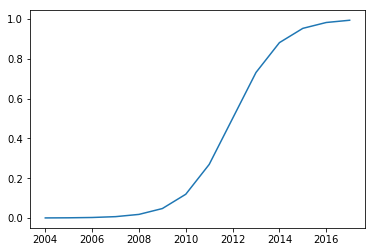

In [8]:
plt.plot(rv_years, yr_scales)

## 3. Scale All Stars in Review

In [9]:
yr_scales = {yr: scale for yr, scale in zip(rv_years, yr_scales)}

In [11]:
stars_time_scaled = [row['stars'] * yr_scales[row['year']] for index, row in yelp_lv_rvs[['stars', 'year']].iterrows()]

In [12]:
yelp_lv_rvs = yelp_lv_rvs.assign(stars_time_scaled=stars_time_scaled)

In [13]:
yelp_lv_rvs[:5]

,db_id,review_id,user_db_id,business_db_id,stars,year,stars_time_scaled
0,3,---3OXpexMp0oAg77xWfYA,999269,92729,5,2012,2.500000
1,6,---94vtJ_5o_nikEs6hUjg,313272,122971,5,2014,4.403985
2,8,---D6-P4MpS86LYldBfX7w,735101,160943,4,2016,3.928055
3,20,---WDP9kwKyVQiw9GTgNmQ,1045600,12131,1,2014,0.880797
4,22,---zHMCae68gIbSbtXxD5w,971613,15470,4,2015,3.810297


## 4. Save Results for Future Analysis

In [15]:
yelp_lv_rvs.to_csv('../../dataset/las_vegas/las_vegas_review_with_stars_time_scaled_with_db_id.csv', index=False)